In [1]:
# Import Libraries
# - Tensorflow
# - Keras
# - numpy

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

import os
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
random.seed(40)         # Initialize the random number generator.
np.random.seed(40)      # With the seed reset, the same set of numbers will appear every time. 
tf.random.set_seed(40)  # sets the graph-level random seed

In [4]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

In [5]:
train_validate_dir = os.path.join("dataset-face-mask", "dataset", "train_validate")
test_dir = os.path.join("dataset-face-mask", "dataset", "test")

In [6]:
masked_img_path = os.path.join(train_validate_dir, "masked")

In [7]:
unmasked_img_path = os.path.join(train_validate_dir, "unmasked")

In [8]:
test_masked_img_path = os.path.join(test_dir, "masked")

In [9]:
test_unmasked_img_path = os.path.join(test_dir, "unmasked")

### 1. Load the images in appropriate data structures in your program, ready to be passed as input to the model for training. Consider input image size to be 64x64x3. [2 points]

In [10]:
from os import listdir
from os.path import join

X_train = []
Y_train = []
for f in os.listdir(masked_img_path):
    # label = "masked"
    label = 1

    # load the input image (64x64) and preprocess it
    image = load_img(join(masked_img_path, f), target_size=(64, 64, 3))
    image = img_to_array(image)
    image = preprocess_input(image)

    # update the data and labels lists, respectively
    X_train.append(image)
    Y_train.append(label)

In [11]:
for f in listdir(unmasked_img_path):
    # extract the class label from the filename
    # label = "unmasked"
    label = 0

    # load the input image (64x64) and preprocess it
    image = load_img(join(unmasked_img_path, f), target_size=(64, 64, 3))
    image = img_to_array(image)
    image = preprocess_input(image)

    # update the data and labels lists, respectively
    X_train.append(image)
    Y_train.append(label)

In [12]:
X_test = []
Y_test = []
for f in listdir(test_masked_img_path):
    # extract the class label from the filename
    # label = "masked"
    label = 1

    # load the input image (64x64) and preprocess it
    image = load_img(join(test_masked_img_path, f), target_size=(64, 64, 3))
    image = img_to_array(image)
    image = preprocess_input(image)

    # update the data and labels lists, respectively
    X_test.append(image)
    Y_test.append(label)

In [13]:
for f in listdir(test_unmasked_img_path):
    # extract the class label from the filename
    # label = "unmasked"
    label = 0

    # load the input image (64x64) and preprocess it
    image = load_img(join(test_unmasked_img_path, f), target_size=(64, 64, 3))
    image = img_to_array(image)
    image = preprocess_input(image)

    # update the data and labels lists, respectively
    X_test.append(image)
    Y_test.append(label)

In [14]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
lb = LabelBinarizer()
Y_test = lb.fit_transform(Y_test)
Y_test = to_categorical(Y_test)
Y_train = lb.fit_transform(Y_train)
Y_train = to_categorical(Y_train)

In [15]:
Y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [16]:
len(Y_train)

1727

In [17]:
len(Y_test)

320

In [18]:
# convert the data and labels to NumPy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [19]:
Y_train.shape

(1727, 2)

In [20]:
X_train.shape

(1727, 64, 64, 3)

In [21]:
X_test.shape

(320, 64, 64, 3)

In [22]:
Y_test.shape

(320, 2)

### 2. Configure the CNN model (use keras tensorflow), an indicative (minimal) configuration is as below. Take activation function (A)=relu. Feel free to use standard values for anything that is not mentioned (eg, take pool size 2x2, filter size 3x3, and so on). [3 points]

In [23]:
# Create a Sequential model object
cnnModel = models.Sequential()

# Add layers Conv2D for CNN and sepcify MaxPooling

# Layer 1 = input layer
cnnModel.add(layers.Conv2D(64, (3,3), activation="relu", input_shape=(64,64,3) ))
cnnModel.add(layers.MaxPooling2D((2,2)))

# Layer 2
cnnModel.add(layers.Conv2D(64, (3,3), activation="relu"))
cnnModel.add(layers.Conv2D(128, (3,3), activation="relu"))
cnnModel.add(layers.MaxPooling2D((2,2)))
cnnModel.add(layers.Flatten())

# Add Dense layers or fully connected layers
# Layer 3
cnnModel.add(layers.Dense(32, activation="relu"))

# Layer 4
cnnModel.add(layers.Dense(2, activation="softmax"))

cnnModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 21632)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                6

### 3. Train the CNN model for E epoch (take E=70), save the train_loss, train_acc, validation_loss, validation_acc for each epoch and plot it after training has finished. [4 points]

In [24]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 
# from keras.optimizers import SGD
# opt = SGD(lr=0.01)
cnnModel.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
# cnnModel.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [25]:
# Shuffle the data as all the classes are currently in order
from sklearn.utils import shuffle
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)

In [26]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [27]:
# train the model
history = cnnModel.fit(X_train, Y_train, epochs = 70, batch_size = 32, validation_split = 0.1, shuffle= False)

Epoch 1/70
49/49 [==============================] - 16s 328ms/step - loss: 0.2390 - accuracy: 0.8906 - val_loss: 0.1447 - val_accuracy: 0.9653
Epoch 2/70
49/49 [==============================] - 15s 306ms/step - loss: 0.1132 - accuracy: 0.9640 - val_loss: 0.1213 - val_accuracy: 0.9827
Epoch 3/70
49/49 [==============================] - 16s 328ms/step - loss: 0.0815 - accuracy: 0.9723 - val_loss: 0.1179 - val_accuracy: 0.9769
Epoch 4/70
49/49 [==============================] - 16s 316ms/step - loss: 0.0691 - accuracy: 0.9807 - val_loss: 0.1023 - val_accuracy: 0.9769
Epoch 5/70
49/49 [==============================] - 20s 403ms/step - loss: 0.0549 - accuracy: 0.9833 - val_loss: 0.1016 - val_accuracy: 0.9769
Epoch 6/70
49/49 [==============================] - 15s 310ms/step - loss: 0.0608 - accuracy: 0.9807 - val_loss: 0.0785 - val_accuracy: 0.9653
Epoch 7/70
49/49 [==============================] - 15s 302ms/step - loss: 0.0449 - accuracy: 0.9858 - val_loss: 0.1237 - val_accuracy: 0.9769

49/49 [==============================] - 16s 332ms/step - loss: 8.9780e-04 - accuracy: 0.9994 - val_loss: 0.1652 - val_accuracy: 0.9827
Epoch 58/70
49/49 [==============================] - 15s 309ms/step - loss: 8.9757e-04 - accuracy: 0.9994 - val_loss: 0.1658 - val_accuracy: 0.9827
Epoch 59/70
49/49 [==============================] - 16s 331ms/step - loss: 8.9737e-04 - accuracy: 0.9994 - val_loss: 0.1659 - val_accuracy: 0.9827
Epoch 60/70
49/49 [==============================] - 15s 314ms/step - loss: 8.9715e-04 - accuracy: 0.9994 - val_loss: 0.1670 - val_accuracy: 0.9827
Epoch 61/70
49/49 [==============================] - 16s 324ms/step - loss: 8.9694e-04 - accuracy: 0.9994 - val_loss: 0.1675 - val_accuracy: 0.9827
Epoch 62/70
49/49 [==============================] - 15s 315ms/step - loss: 8.9675e-04 - accuracy: 0.9994 - val_loss: 0.1678 - val_accuracy: 0.9827
Epoch 63/70
49/49 [==============================] - 16s 317ms/step - loss: 8.9659e-04 - accuracy: 0.9994 - val_loss: 0.1681

### 4. Evaluate the trained CNN model on test data. Print classification results. [2 point]

In [28]:
print('Final training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1])

Final training loss 	 0.0008958486723713577
Final training accuracy  0.9993565082550049


In [29]:
# testing the model
testLoss, testAccuracy = cnnModel.evaluate(X_test, Y_test)

10/10 [==============================] - 1s 96ms/step - loss: 1.6972 - accuracy: 0.7937


In [30]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

Testing loss 	 1.6971855163574219
Testing accuracy  0.793749988079071


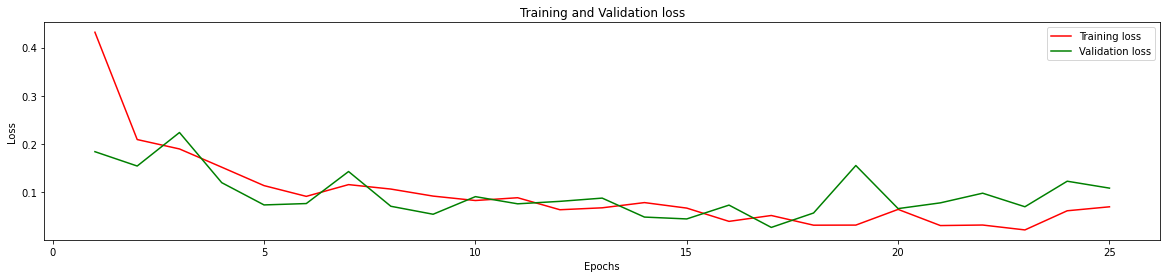

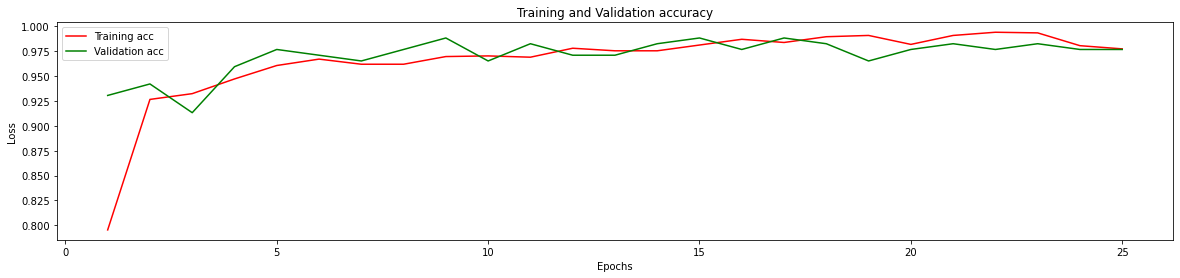

In [43]:
# plotting training and validation loss
fig, ax = plt.subplots(figsize=(20,4))
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plotting training and validation accuracy
fig, ax = plt.subplots(figsize=(20,4))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
Y_prediction = cnnModel.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_prediction, axis = 1) 

# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test,axis = 1) 

In [33]:
# Classification Report
from sklearn.metrics import classification_report 

print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       160
           1       0.84      0.73      0.78       160

    accuracy                           0.79       320
   macro avg       0.80      0.79      0.79       320
weighted avg       0.80      0.79      0.79       320



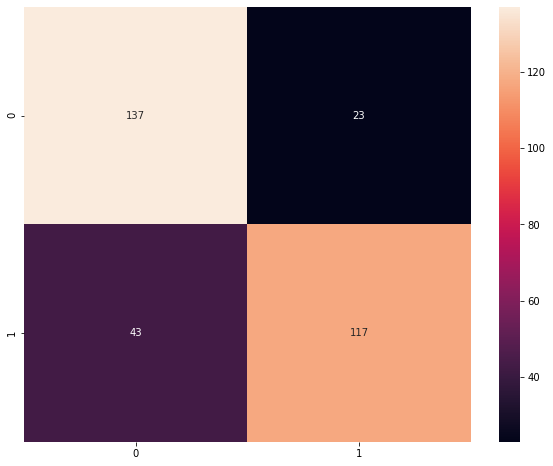

In [34]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d");

# 5. Can you try to make changes in anyway in the CNN model and improve your test accuracy? Let's call the model constructed as per step-2 above as 'default' and the improvement as 'improved' model.

In [35]:
# Create a Sequential model object
# from tensorflow.keras import regularizers
cnnImprovedModel = models.Sequential()

# Add layers Conv2D for CNN and sepcify MaxPooling

# Layer 1 = input layer
cnnImprovedModel.add(layers.Conv2D(64, (3,3), activation="relu", input_shape=(64,64,3) ))

cnnImprovedModel.add(layers.MaxPooling2D((2,2)))

# Layer 2
cnnImprovedModel.add(layers.Conv2D(128, (3,3), activation="relu"))
cnnImprovedModel.add(layers.Conv2D(256, (3,3), activation="relu"))
cnnImprovedModel.add(layers.MaxPooling2D((2,2)))
# Added for improvement
# cnnImprovedModel.add(layers.Dropout(0.5))

# Added for improvement
cnnImprovedModel.add(layers.Conv2D(128, (3,3), activation="relu"))
cnnImprovedModel.add(layers.MaxPooling2D((2,2)))

# Added for improvement
cnnImprovedModel.add(layers.Conv2D(256, (3,3), activation="relu"))
cnnImprovedModel.add(layers.MaxPooling2D((2,2)))

# Added for improvement
cnnImprovedModel.add(layers.Dropout(0.5))
cnnImprovedModel.add(layers.Flatten())

# Add Dense layers or fully connected layers
# Layer 4
cnnImprovedModel.add(layers.Dense(64, activation="relu"))
# layer 2 with L1-L2 with Regularizers
# cnnModel.add(layers.Dense(64, activation='relu', kernel_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01), 
#                           activity_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01) ) )

cnnImprovedModel.add(layers.Dense(32, activation="relu"))

# Layer 6
cnnImprovedModel.add(layers.Dense(2, activation="softmax"))

cnnImprovedModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 27, 27, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 128)       295040    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 128)        

In [36]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 
# from keras.optimizers import SGD
# opt = SGD(lr=0.01)
cnnImprovedModel.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
# cnnModel.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [37]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [38]:
# train the model
# from tensorflow.keras.callbacks import EarlyStopping
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

# fit model
# history = cnnModel.fit(Xtrain, Ytrain, epochs = 25, batch_size = 64, 
#                        validation_split = 0.1, callbacks=[es])
history = cnnImprovedModel.fit(X_train, Y_train, epochs = 25, batch_size = 32, validation_split = 0.1, shuffle= False)

Epoch 1/25
49/49 [==============================] - 41s 839ms/step - loss: 0.4316 - accuracy: 0.7954 - val_loss: 0.1844 - val_accuracy: 0.9306
Epoch 2/25
49/49 [==============================] - 40s 822ms/step - loss: 0.2095 - accuracy: 0.9266 - val_loss: 0.1547 - val_accuracy: 0.9422
Epoch 3/25
49/49 [==============================] - 39s 798ms/step - loss: 0.1900 - accuracy: 0.9324 - val_loss: 0.2241 - val_accuracy: 0.9133
Epoch 4/25
49/49 [==============================] - 41s 844ms/step - loss: 0.1523 - accuracy: 0.9472 - val_loss: 0.1202 - val_accuracy: 0.9595
Epoch 5/25
49/49 [==============================] - 40s 808ms/step - loss: 0.1142 - accuracy: 0.9607 - val_loss: 0.0742 - val_accuracy: 0.9769
Epoch 6/25
49/49 [==============================] - 41s 831ms/step - loss: 0.0919 - accuracy: 0.9672 - val_loss: 0.0770 - val_accuracy: 0.9711
Epoch 7/25
49/49 [==============================] - 41s 828ms/step - loss: 0.1162 - accuracy: 0.9620 - val_loss: 0.1433 - val_accuracy: 0.9653

In [39]:
print('Final training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1])

Final training loss 	 0.07028932124376297
Final training accuracy  0.977477490901947


In [40]:
# testing the model
testLoss, testAccuracy = cnnImprovedModel.evaluate(X_test, Y_test)

10/10 [==============================] - 2s 216ms/step - loss: 0.4625 - accuracy: 0.9000


In [41]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

Testing loss 	 0.4624880254268646
Testing accuracy  0.8999999761581421


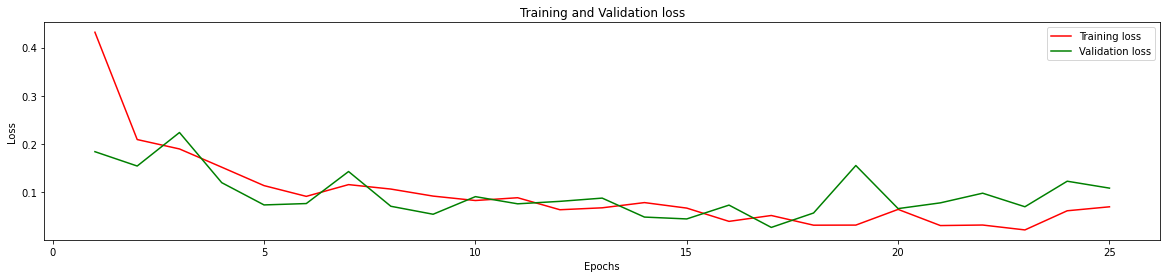

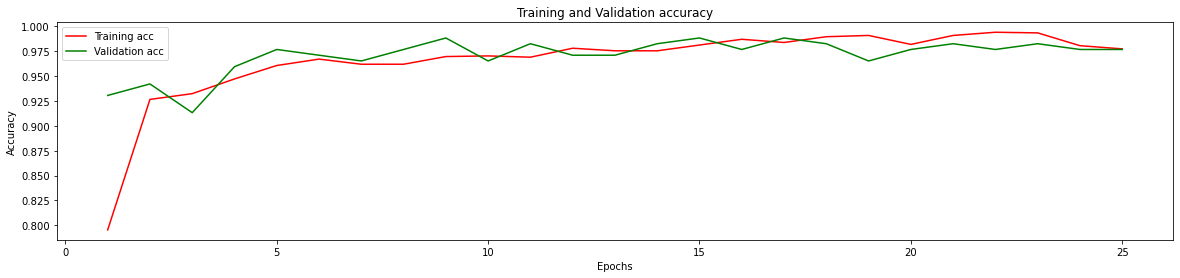

In [44]:
# plotting training and validation loss
fig, ax = plt.subplots(figsize=(20,4))
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plotting training and validation accuracy
fig, ax = plt.subplots(figsize=(20,4))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [45]:
Y_prediction_improved = cnnImprovedModel.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes_improved = np.argmax(Y_prediction_improved, axis = 1) 

# Convert validation observations to one hot vectors
Y_true_improved = np.argmax(Y_test,axis = 1) 

In [47]:
# Classification Report
from sklearn.metrics import classification_report 
imporved_model_report = classification_report(Y_true_improved, Y_pred_classes_improved)
print(classification_report(Y_true_improved, Y_pred_classes_improved))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       160
           1       0.92      0.88      0.90       160

    accuracy                           0.90       320
   macro avg       0.90      0.90      0.90       320
weighted avg       0.90      0.90      0.90       320



### Plot precision and recall for default and improved model in a single bar plot

In [91]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

improved_precision_recall = precision_recall_fscore_support(Y_true_improved, Y_pred_classes_improved,average=None)
#improved_model_report = confusion_matrix(Y_true_improved, Y_pred_classes_improved)
improved_precision_recall

(array([0.88554217, 0.91558442]),
 array([0.91875, 0.88125]),
 array([0.90184049, 0.89808917]),
 array([160, 160], dtype=int64))

In [80]:
from sklearn.metrics import confusion_matrix
default_precision_recall = precision_recall_fscore_support(Y_true, Y_pred_classes,average=None)
default_precision_recall

(array([0.76111111, 0.83571429]),
 array([0.85625, 0.73125]),
 array([0.80588235, 0.78      ]),
 array([160, 160], dtype=int64))

In [99]:
import pandas as pd
df =pd.DataFrame()
df["Precision_0"] = [ round(default_precision_recall[0][0],2) , round(improved_precision_recall[0][0],2) ]
df["Precision_1"] = [ round(default_precision_recall[0][1],2) , round(improved_precision_recall[0][1],2) ]
df["Recall_0"] = [ round(default_precision_recall[1][0],2) , round(improved_precision_recall[1][0],2) ]
df["Recall_1"] = [ round(default_precision_recall[1][1],2) , round(improved_precision_recall[1][1],2) ]


In [100]:
df.index=['default','modified']
df


,Precision_0,Precision_1,Recall_0,Recall_1
default,0.76,0.84,0.86,0.73
modified,0.89,0.92,0.92,0.88


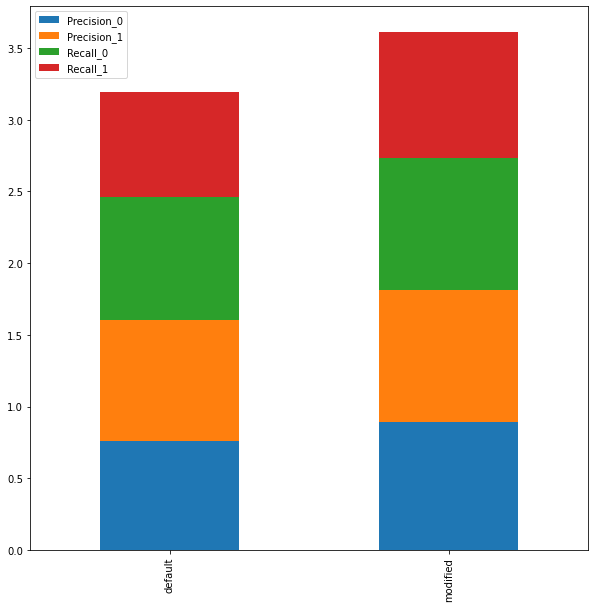

In [101]:
df.plot(kind='bar',stacked=True, figsize=(10,10))